<a href="https://colab.research.google.com/github/vivekpenuli/Ml_class/blob/main/Logistic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/vivekpenuli/Ml_class/main/Logistic/Social_Network_Ads.csv")

In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
x=df.iloc[:,2:4].values #only targeting column 2 and column 3 .


In [6]:
x[0:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]])

In [7]:

y= df.iloc[:,-1].values

In [8]:
y[0:5]

array([0, 0, 0, 0, 0])

In [9]:

from sklearn.model_selection import train_test_split

In [10]:

x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=75)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
log = LogisticRegression()

In [13]:

log.fit(x_train,y_train)

LogisticRegression()

In [16]:
y_pre=log.predict(x_test)


In [17]:
y_pre[0:5]

array([0, 0, 0, 0, 0])

In [36]:
result = pd.DataFrame({"Actual_Pre":y_test , "prediction":y_pre})

In [37]:
result

,Actual_Pre,prediction
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
75,1,0
76,0,0
77,0,0
78,0,0


<ipython-input-25-a96133a3cb52>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=df.corr()


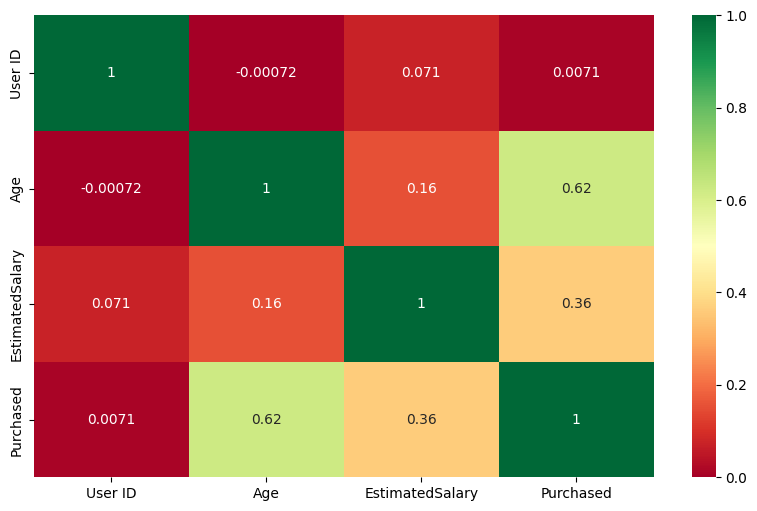

In [25]:

import matplotlib.pyplot as plt
import seaborn as sns
corrmat=df.corr()
top=corrmat.index
plt.figure(figsize=(10,6))
g=sns.heatmap(df[top].corr(),annot=True,cmap='RdYlGn')

In [32]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(confusion_matrix, class_names, figsize = (6,4), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap="YlGnBu")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Actual or Truth')
    plt.xlabel('Prediction')

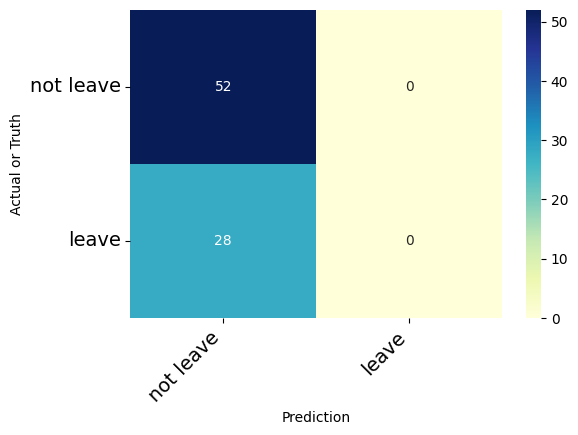

In [33]:
cm = confusion_matrix(y_test,y_pre)
print_confusion_matrix(cm,["not leave","leave"])

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pre))


              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
